In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

%config InlineBackend.figure_format = 'retina'

In [24]:
input_file = pd.read_csv('../graph/bitcoin-undirected.edgelist', header=0, sep=' ', names=['from', 'to'])

telenor_file = pd.read_csv('p2p_may.txt', header=0, sep='\t')
telenor_file = telenor_file.rename(columns={"A": "from", "B": "to"})

G_btc = nx.from_pandas_edgelist(input_file, 'from', 'to')
G_telenor = nx.from_pandas_edgelist(telenor_file, 'from', 'to')

In [25]:
graph = G_btc

ids, ccs, gammas, degrees = utils.extract_graph_info(graph)
graph_df = pd.DataFrame({"Cluster Coefficient": ccs, "Gamma": gammas, "Node Degree": degrees}, index=ids)

100%|██████████| 5881/5881 [00:07<00:00, 823.68it/s]


Mean node degree: 0.3090379202153987
Median node degree: 0.0


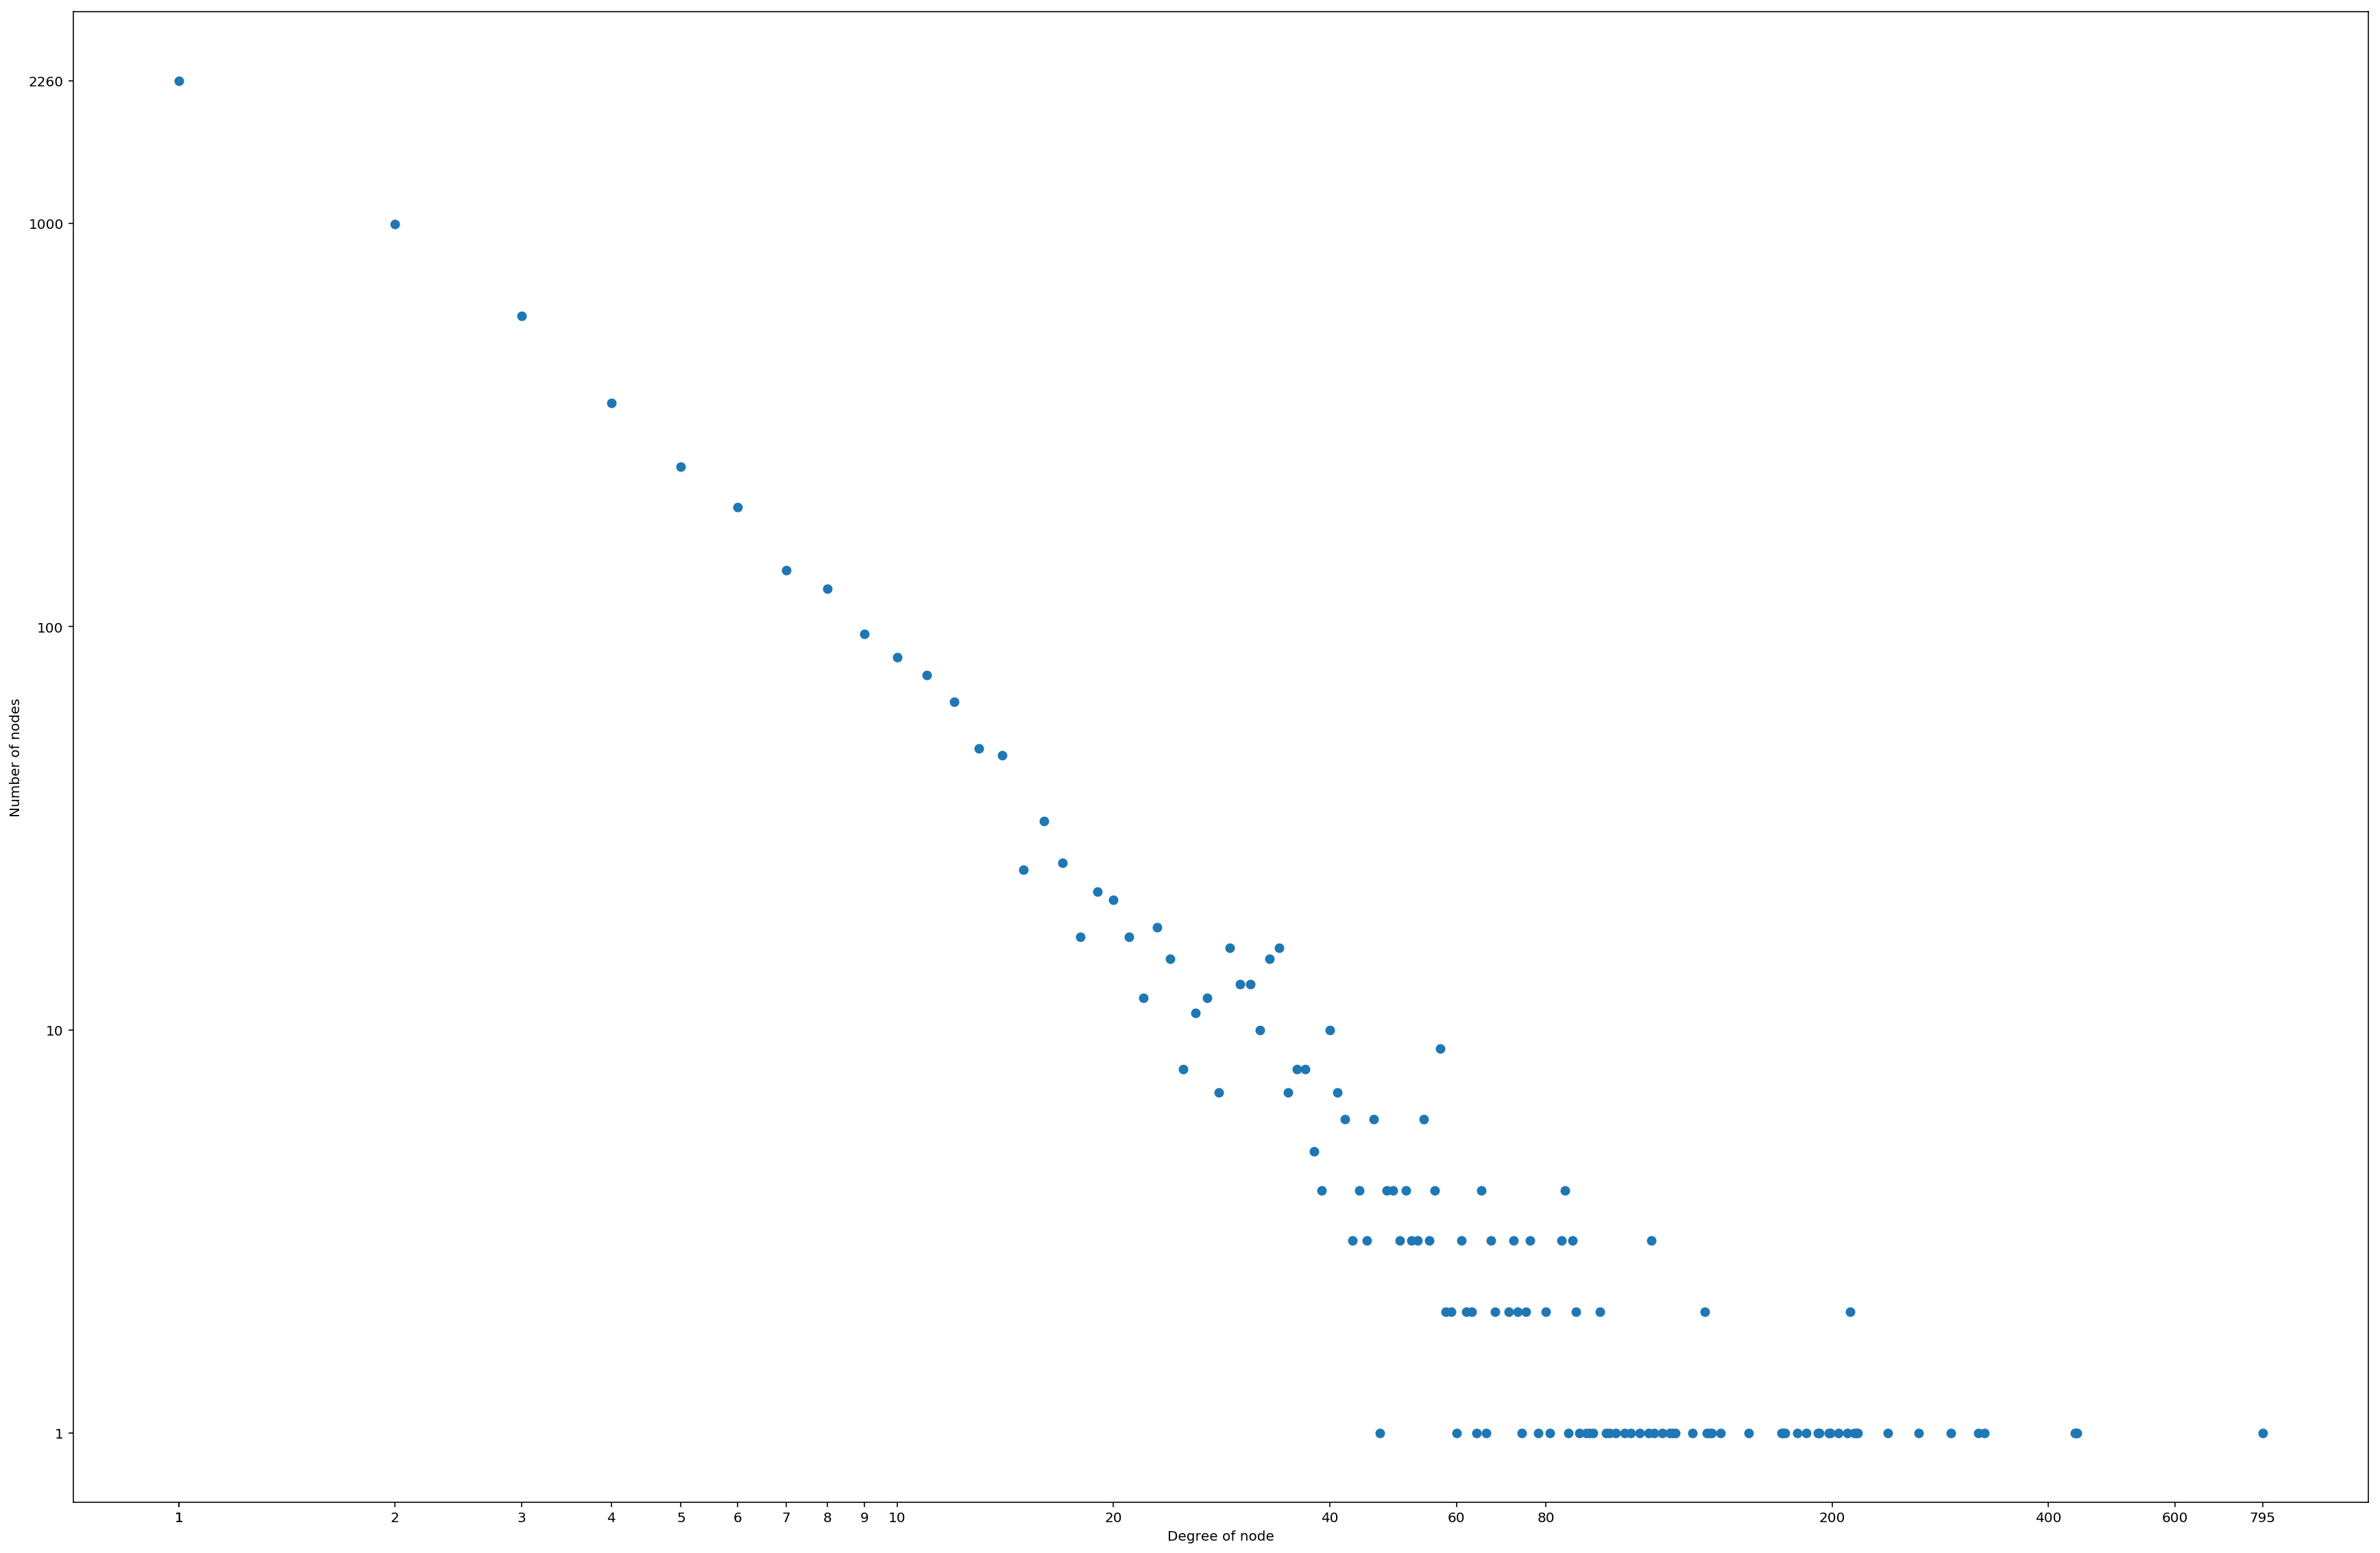

In [26]:
#Stats for node degrees
print("Mean node degree: {}".format(graph_df["Gamma"].mean()))
print("Median node degree: {}".format(graph_df["Gamma"].median()))

degrees = graph_df.groupby("Node Degree").count()

plt.figure(figsize=(30,20))
plt.scatter(np.log10(degrees.index.values), np.log10(degrees["Gamma"]))

x_ticks = [0] + [np.log10(i) for i in range(1, 11)] + [np.log10(i) for i in range(20, 100, 20)] + [np.log10(i) for i in range(200, degrees.index.max(), 200)] + [np.log10(degrees.index.max())]
y_ticks = [0, 1, 2, 3, np.log10(degrees["Gamma"].max())]

plt.xticks(x_ticks, list(map(lambda tick: int(round(10**tick, 0)), x_ticks)))
plt.yticks(y_ticks, list(map(lambda tick: int(round(10**tick, 0)), y_ticks)))
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.savefig("img/degree_distribution.png", bbox_inches='tight')

In [13]:
print(graph_df.shape)

(494018, 3)


In [14]:
print("Percentage of nodes that have fewer than 10 neighbors: {}".format(graph_df[graph_df['Node Degree'] <= 10].shape[0] / graph_df.shape[0]))
print("Percentage of nodes that have fewer between 11 and 100 neighbors: {}".format(graph_df[(graph_df['Node Degree'] > 10) & (graph_df['Node Degree'] <= 100)].shape[0] / graph_df.shape[0]))
print("Percentage of nodes that have more than 100 neighbors: {}".format(graph_df[graph_df['Node Degree'] > 100].shape[0] / graph_df.shape[0]))

Percentage of nodes that have fewer than 10 neighbors: 0.9871806290459052
Percentage of nodes that have fewer between 11 and 100 neighbors: 0.012497520333267209
Percentage of nodes that have more than 100 neighbors: 0.0003218506208275812
